# Feature Selection
<hr style="height:1px;border:none;color:#333;background-color:#333;" />


### Importing modules, configuring display options, and loading dataset 

In [349]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# import warnings
# warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso

In [350]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [351]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Price_Data_cleaned.csv')

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Explore Dataset

#### Variable types

In [352]:
# Basement - Ava
'BsmtQual', 'BsmtCond','BsmtFinType1', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF'

#Outside of house - Khamanna
'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea'

#Overall- Ariel
'OverallQual', 'OverallCond', 'PavedDrive', 'Fence', 'RoofStyle', 'RoofMatl'
'GarageFinish', 'GarageQual', 'GarageCond',

# Inside House - Shay
'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'LowQualFinSF'
 
# y = beta0 + beta1*X1 + beta2*X2 + beta3*X3 + beta4*X4 ...+ betan*Xn(Exterior Quality)

('HeatingQC',
 'CentralAir',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'LowQualFinSF')

In [353]:
continues_variables = ['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
                       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                       'SalePrice', 'LotFrontage']

discrete_variables = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                      'MoSold', 'YrSold']

categorical_nominal_variables = ['MSSubClass', 'Alley', 'LandContour', 'MSZoning', 'LotConfig', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                                 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Street', 'Heating',
                                 'GarageType', 'CentralAir', 'MiscFeature', 'SaleType', 'SaleCondition']

categorical_ordinal_variables = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                                 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 
                                 'GarageFinish', 'PavedDrive', 'Fence', 'Functional', 'BsmtFinType2', 'Electrical',
                                 'BsmtFinType1','BsmtExposure', 'LandSlope', 'Utilities', 'LotShape',]


#### Converting Categorical Variables to Ordinal Variables

In [354]:
# Encoding Ordinal Variables
dict_1 = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
dict_2 = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
dict_3 = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
dict_4 = {"None":0, "Unf":1, "RFn":2, "Fin":3}
dict_5 = {"N":1, "P":2, "Y":3}
dict_6 = {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}
dict_7 = {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}
dict_8 = {"Mix":1, "FuseP":2, "FuseF":3, "FuseA":4, "SBrkr":5}
dict_9 = {"Sev":1, "Mod":2, "Gtl":3}
dict_10 = {"ELO":1, "NoSeWa":2, "NoSewr":3, "AllPub":4}
dict_11 = {"IR3":1, "IR2":2, "IR1":3, "Reg":4}

dataset.BsmtExposure.replace(dict_1, inplace=True)
dataset.ExterQual.replace(dict_2, inplace=True)
dataset.ExterCond.replace(dict_2, inplace=True)
dataset.BsmtQual.replace(dict_2, inplace=True)
dataset.BsmtCond.replace(dict_2, inplace=True)
dataset.HeatingQC.replace(dict_2, inplace=True)
dataset.KitchenQual.replace(dict_2, inplace=True)
dataset.FireplaceQu.replace(dict_2, inplace=True)
dataset.GarageQual.replace(dict_2, inplace=True)
dataset.GarageCond.replace(dict_2, inplace=True)
dataset.PoolQC.replace(dict_2, inplace=True)
dataset.BsmtFinType1.replace(dict_3, inplace=True)
dataset.BsmtFinType2.replace(dict_3, inplace=True)
dataset.GarageFinish.replace(dict_4, inplace=True)
dataset.PavedDrive.replace(dict_5, inplace=True)
dataset.Fence.replace(dict_6, inplace=True)
dataset.Functional.replace(dict_7, inplace=True)
dataset.Electrical.replace(dict_8, inplace=True)
dataset.LandSlope.replace(dict_9, inplace=True)
dataset.Utilities.replace(dict_10, inplace=True)
dataset.LotShape.replace(dict_11, inplace=True)


#### Converting Categorical Variable to Dummy Variables

In [355]:
# set the MSSubClass column to object, since it is a nominal variable
dataset['MSSubClass'] = dataset['MSSubClass'].astype(object)

In [356]:
# new dataset that will hold the encoded categorical variables + all the others
dataset_encoded = dataset.copy()

In [357]:
# Encode all categorical nominal variables
for column_name in categorical_nominal_variables:
    dataset_encoded = pd.concat([dataset_encoded, pd.get_dummies(dataset_encoded[column_name],\
                                                                 prefix=column_name, drop_first=True)], axis=1)

In [358]:
# Remove original categorical columns
dataset_encoded = dataset_encoded.drop(categorical_nominal_variables, axis=1)

In [359]:
dataset_encoded

,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Street_Pave,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,CentralAir_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,126000,64.0,7890,4,4,3,6,6,1939,1950,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,5,856,0,0,1.0,0.0,1,0,2,1,3,4,8,1,4,1939.0,1,2.0,399.0,3,3,3,0,0,0,0,166,0,0,0,0,3,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1049,139500,42.0,4235,4,4,3,5,5,1984,1984,149.0,4,3,4,3,2,6,552.0,5,393.0,104.0,1049.0,3

#### MultiCollinearity

In [360]:
# Generate correlation matrix (continues variables only)
corr_matrix = dataset[continues_variables].corr(method="pearson") # pearson? kendall? which is best

In [361]:
# List of highly (>0.79) correlated pair of variables
c_m = list(corr_matrix.columns)
for index_ in corr_matrix.columns:
    c_m.remove(index_)
    for feature in c_m:
        if abs(corr_matrix.loc[index_,feature])>0.7:
            print(index_,"_",feature,": ",corr_matrix.loc[index_,feature], sep="")

GrLivArea_SalePrice: 0.7199799401450586
TotalBsmtSF_1stFlrSF: 0.7842803487175525


In [362]:
# plt.figure(figsize=(14,10))
# sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5, annot=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Feature Selection

#### Using Lasso Regression to Select Features

In [363]:
X = dataset_encoded.drop('SalePrice',axis=1)  # features
y = dataset_encoded['SalePrice']         # target
X_norm = MinMaxScaler().fit_transform(X)      # Transform features by scaling each feature to a given range.

In [364]:
num_f = 10 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_lr_selector = SelectFromModel(Lasso(alpha=0.001), max_features=num_f)
# Penalty="l1" -> indicates regularization using L1
embeded_lr_selector.fit(X_norm, y) # Fit the SelectFromModel meta-transformer.

embeded_lr_support = embeded_lr_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist() # List of features
print(str(len(embeded_lr_feature)), 'selected features')

10 selected features


/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543107957916.1428, tolerance: 1451865022.2764199
  positive)


In [365]:
# embeded_lr_feature
# list_features = [x[0:(x.find("_"))] for x in embeded_lr_feature]
list_features = []
for column_name in embeded_lr_feature:
    if '_' in column_name:
        list_features.append(column_name[0:column_name.find("_")])
    else:
        list_features.append(column_name)


In [366]:
embeded_lr_feature

['GrLivArea',
 'LotArea',
 'OverallQual',
 'BsmtFinSF1',
 '1stFlrSF',
 'PoolArea',
 'PoolQC',
 'Neighborhood_GrnHill',
 'Condition2_PosA',
 'Condition2_PosN']

In [367]:
list_feat = set(list_features)

In [368]:
dataset[list_feat].dtypes.sort_values()

PoolArea          int64
LotArea           int64
OverallQual       int64
1stFlrSF          int64
GrLivArea         int64
PoolQC            int64
BsmtFinSF1      float64
Neighborhood     object
Condition2       object
dtype: object

In [369]:
list(list_feat)

['BsmtFinSF1',
 'PoolArea',
 'Neighborhood',
 'LotArea',
 'OverallQual',
 '1stFlrSF',
 'GrLivArea',
 'Condition2',
 'PoolQC']

#### Using F Test to Select Features

In [370]:
value_f, p_f = f_classif(X_norm, y)
pd.Series(p_f, index=X.columns).sort_values().head(20)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SaleCondition_Partial     0.000000e+00
SaleType_New              0.000000e+00
Exterior1st_ImStucc       0.000000e+00
Condition2_RRAn           0.000000e+00
Condition2_PosN           0.000000e+00
MSSubClass_150            0.000000e+00
SaleCondition_Alloca     8.146065e-305
OverallQual              3.640980e-271
Condition2_PosA          3.008646e-213
GrLivArea                2.544883e-177
Street_Pave              1.161482e-171
ExterQual                2.922177e-141
Neighborhood_NridgHt     2.191582e-135
Neighborhood_NoRidge     8.940149e-124
1stFlrSF                 1.045746e-112
TotalBsmtSF              3.097936e-111
KitchenQual              2.109207e-108
GarageCars               5.613187e-107
GarageArea                1.012057e-98
BsmtQual                  4.494704e-94
dtype: float64

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Descriptive Modeling

#### Train and Test data

In [399]:
# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Multiple Linear Regression (All the variables)

In [404]:
mlr_model = LinearRegression()
mlr_model.fit(X_train,np.log(y_train))
X_train.shape
y_train.shape

(1805,)

In [373]:
mlr_model.score(X_train,np.log(y_train))

0.9387712279193521

In [374]:
# Overfitting when using all the features to train the model
mlr_model.score(X_test,np.log(y_test))

-979730633.8517914

<hr>

#### Linear Model with limited variables

In [375]:
temp_col = ['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide','Neighborhood_ClearCr', \
            'Neighborhood_CollgCr', 'Neighborhood_Crawfor','Neighborhood_Edwards', 'Neighborhood_Gilbert', \
            'Neighborhood_Greens','Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',\
            'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes','Neighborhood_NPkVill', \
            'Neighborhood_NWAmes', 'Neighborhood_NoRidge','Neighborhood_NridgHt', 'Neighborhood_OldTown', \
            'Neighborhood_SWISU','Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',\
            'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'] \
            + ['GrLivArea','LotArea','OverallQual','OverallCond','TotalBsmtSF','YearBuilt',]

In [376]:
# X_train.filter(like="Neighborhood").columns.tolist() 
# X_train.filter(like="Condition2").columns.tolist()
temp_col = ['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea']
# pd.concat(X_train[['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea']],X_train.filter(like="Neighborhood"),X_train.filter(like="Condition2"))

In [377]:
mlr_model.fit(X[temp_col], np.log(y))
mlr_model.score(X_train[temp_col], np.log(y_train))

0.8179483840437746

In [378]:
mlr_model.score(X_test[temp_col], np.log(y_test))

0.8466842662465299

In [379]:
X[temp_col].columns

Index(['1stFlrSF', 'OverallQual', 'LotArea', 'BsmtFinSF1', 'GrLivArea'], dtype='object')

In [380]:
mlr_model.coef_

array([1.20044559e-04, 1.52304430e-01, 3.48673507e-06, 1.59606945e-04,
       2.42077173e-04])

In [381]:
a = pd.DataFrame(zip(X[temp_col], mlr_model.coef_), columns = ['Temp.Cols', 'Temp.Coefs'])
a

,Temp.Cols,Temp.Coefs
0,1stFlrSF,0.000120
1,OverallQual,0.152304
2,LotArea,0.000003
3,BsmtFinSF1,0.000160
4,GrLivArea,0.000242


In [382]:
# y = beta0 + beta1*X1 + beta2*X2 + beta3*X3 + betaa4*X4 ...+ betan*Xn(Exterior Quality)

<hr>

In [393]:
# adding Kitchen Quality
temp_col_k = ['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea','KitchenQual','ExterQual','MasVnrType_None']

In [394]:
mlr_model.fit(X[temp_col_k], np.log(y))
mlr_model.score(X_train[temp_col_k], np.log(y_train))

0.8302687253852741

In [395]:
mlr_model.score(X_test[temp_col_k], np.log(y_test))

0.8661392249313751

In [396]:
X_test[temp_col_k].columns

Index(['1stFlrSF', 'OverallQual', 'LotArea', 'BsmtFinSF1', 'GrLivArea',
       'KitchenQual', 'ExterQual', 'MasVnrType_None'],
      dtype='object')

In [397]:
mlr_model.coef_

array([ 1.01628470e-04,  1.16649735e-01,  3.83781746e-06,  1.51058379e-04,
        2.36856278e-04,  6.25314660e-02,  6.16906208e-02, -1.77843013e-02])

In [398]:
list(zip(X_test[temp_col_k], mlr_model.coef_))#, columns = ['Temp.Cols', 'Temp.Coefs']

[('1stFlrSF', 0.00010162846971798986),
 ('OverallQual', 0.11664973526884877),
 ('LotArea', 3.837817460293304e-06),
 ('BsmtFinSF1', 0.00015105837895394472),
 ('GrLivArea', 0.000236856277630016),
 ('KitchenQual', 0.06253146602587716),
 ('ExterQual', 0.0616906207653151),
 ('MasVnrType_None', -0.01778430125398906)]

<hr>

In [270]:
# dataset['Year.Diff'] = dataset['YrSold']- dataset['YearRemodAdd']
# within = pd.DataFrame(dataset[dataset['Year.Diff']<=10].groupby('Neighborhood')['SalePrice'].mean())
# #print(within)
# out = pd.DataFrame(dataset[dataset['Year.Diff']>10].groupby('Neighborhood')['SalePrice'].mean())
# #print(out)
# RemodelDif = pd.merge(within, out, left_on='Neighborhood', right_on = "Neighborhood", how='outer').reset_index()
# RemodelDif.columns=['Neighborhood','SoldAfterRemodel','SoldWithoutRemodel']
# RemodelDif1 = RemodelDif.set_index('Neighborhood').sort_values(by = "SoldAfterRemodel", axis=0, ascending = False)
# print(RemodelDif1)
# #drop(RemodelDif.index[[0,16,25,26,27]]).
# RemodelDif1.plot(kind='barh', figsize=(10,10))

In [12]:
#dataset.groupby('Neighborhood').YearBuilt.unique()
print(dataset[dataset.Neighborhood == 'NridgHt']['YearBuilt'].unique())
dataset[dataset.Neighborhood == 'NridgHt']['YearBuilt'].shape

[2006 2005 2003 2007 2004 2008 2001 2009 2002]


(121,)

In [8]:
#dataset[dataset.Neighborhood == 'NPkVill']['YearBuilt'].unique()

In [13]:
print(dataset[dataset.Neighborhood == 'Blmngtn']['YearBuilt'].unique())
dataset[dataset.Neighborhood == 'Blmngtn']['YearBuilt'].shape

[2007 2006 2003 2002 2004 2005]


(23,)

In [ ]:
# Exterior1st: Exterior covering on house

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast	
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
	
# Exterior2nd: Exterior covering on house (if more than one material)

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles


# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone
	
# MasVnrArea: Masonry veneer area in square feet

# ExterQual: Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		
# ExterCond: Evaluates the present condition of the material on the exterior
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

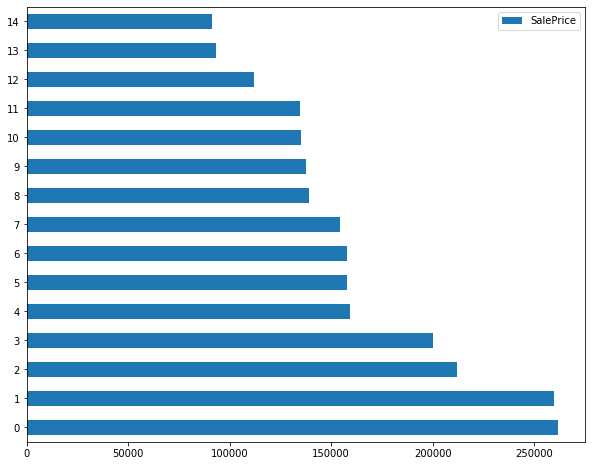

In [206]:

Exterior1st = pd.DataFrame(dataset.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False)).reset_index()
Exterior1st.plot(kind = 'barh', figsize = (10,8))
#dataset.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False).plot(kind = 'barh', figsize = (10,8))

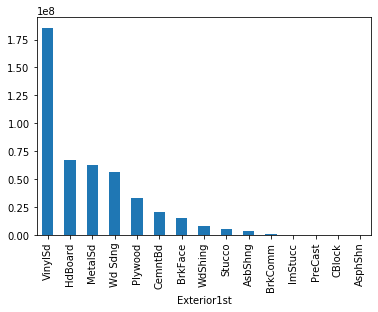

In [208]:
dataset.groupby('Exterior1st')['SalePrice'].sum().sort_values(ascending=False).plot.bar()

In [192]:

Exterior2nd = pd.DataFrame(dataset.groupby('Exterior2nd')['SalePrice'].median().sort_values(ascending=False)).reset_index()
#Exterior2nd#.plot(kind = 'barh', figsize = (10,8))
#dataset.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False).plot(kind = 'barh', figsize = (10,8))

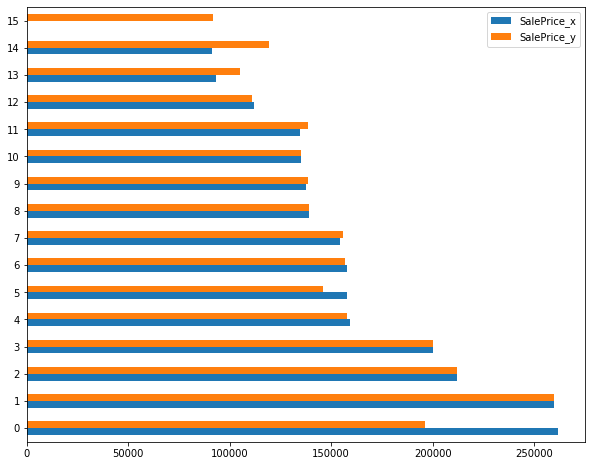

In [195]:
df = pd.merge(Exterior1st, Exterior2nd, left_on = 'Exterior1st', right_on = 'Exterior2nd', how ='outer')
#df
df.plot(kind = 'barh', figsize = (10,8))

In [189]:
print(dataset.loc[dataset['Exterior1st']=='Stone']['Exterior2nd'])
dataset.loc[dataset['Exterior2nd']=='Stone']['Exterior1st']

Series([], Name: Exterior2nd, dtype: object)


1385    BrkFace
1619    BrkFace
1880     Stucco
2220    BrkFace
Name: Exterior1st, dtype: object

In [ ]:
#ImStucc = one observation for Exterior 1st, around 10 for Exterior 2nd
#PreCast = only one observation in both
#CmentBd = tons for Exterior 1st, none for 2nd (change in Exterior 2nd for Wood Shingles for two observations)

In [171]:
dict_15 = {'Wd Shng':'WdShing', 'CmentBd':'CemntBd', 'Brk Cmn':'BrkComm'}
dataset.Exterior2nd.replace(dict_15, inplace=True)

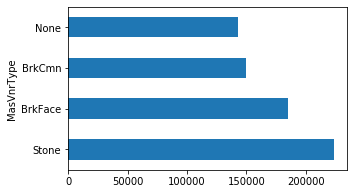

In [188]:
dataset.groupby('MasVnrType')['SalePrice'].median().sort_values(ascending=False).plot(kind = 'barh', figsize = (5,3))

In [213]:
dataset.groupby('MasVnrType')['SalePrice'].count().sort_values(ascending=False)#.plot(kind = 'barh', figsize = (5,3))

MasVnrType
None       1572
BrkFace     804
Stone       183
BrkCmn       20
Name: SalePrice, dtype: int64

In [ ]:
#??Impute the "None"?? Otherwise there's bias

In [244]:
dataset[dataset['MasVnrArea']==0]['SalePrice'].sum()

242708700

In [243]:
dataset[dataset['MasVnrArea']!='None']['SalePrice'].sum()

459199828

In [254]:
dataset.groupby('ExterQual')['SalePrice'].count().sort_values(ascending=False)

ExterQual
TA    1635
Gd     841
Ex      73
Fa      30
Name: SalePrice, dtype: int64

In [252]:
dataset.groupby('ExterQual')['YearBuilt'].count()

ExterQual
Ex      73
Fa      30
Gd     841
TA    1635
Name: YearBuilt, dtype: int64

In [250]:
dataset.groupby('ExterCond')['YearBuilt'].count()

ExterCond
Ex      11
Fa      56
Gd     279
Po       2
TA    2231
Name: YearBuilt, dtype: int64

In [311]:
# new dataset that will hold the encoded categorical variables + all the others
dataset_encoded = dataset.copy()

In [312]:
X = dataset_encoded.drop('SalePrice',axis=1)  # features
y = dataset_encoded['SalePrice']

In [313]:
# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)